# Анализ датасета о продуктах

Ход работы:
1. Импортируйте библиотеки, которые были описаны на лекции
2. Импортируйте датасет foodmart.products.tsv, предварительно скачав его
3. Проведите анализ данных, используя лекционный файл 6 EDA в качестве примера.
 - Прим. *Для отображения используйте библиотеку seaborn или plotly!*
 - Отобразите 5 первых элементов таблицы и пять последних
 - Отобразите статистику по датасету, используя функции .info(), .describe()
 - Изучите таблицу на наличие дублей, удалите их, если обнаружите
 - Визуализируйте данные (обязательно scatterplot, hist, countplot, pairplot + что-нибудь интересное из библиотеки на ваш вкус)
 - Постройте матрицу корреляции признаков
 - Изучите пропуски, обработайте их удалением или заполнением (средним значением, модой и тд)
 - Поищите выбросы в данных. Их не удаляйте, добавьте новый столбец-маркер "Outlier" и отметьте в нем True для выбросов и False - в противоположном случае
 - Преобразуйте все данные к их истинным типам. Например, low_fat - к типу bool, подумайте, что нужно сделать. Числовые типы - соответственно к int или float
 - Приведите все столбцы строкового типа к нижнему регистру
 - brand_name дублируется в product_name, очистите product_name от дублирования

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns            
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

df = pd.read_csv("foodmart.products.tsv", sep="\t")
df.head(5)


,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [191]:
df.tail(5)


,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
1555,53,1556,CDR,CDR Creamy Peanut Butter,29538288712,2.65,6.94,3.94,True,True,7,9,11.10,3.98,17.5
1556,33,1557,CDR,CDR Strawberry Preserves,50687324404,1.20,15.40,13.30,True,False,15,6,14.10,14.80,19.3
1557,53,1558,CDR,CDR Extra Chunky Peanut Butter,84930775761,2.16,11.50,9.50,False,True,22,10,7.35,9.29,12.4
1558,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.8
1559,31,1560,CDR,CDR Grape Jelly,54896665215,1.60,12.50,10.50,False,True,1,9,5.44,3.24,18.3


In [192]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_class_id    1560 non-null   int64  
 1   product_id          1560 non-null   int64  
 2   brand_name          1560 non-null   object 
 3   product_name        1560 non-null   object 
 4   SKU                 1560 non-null   int64  
 5   SRP                 1560 non-null   float64
 6   gross_weight        1560 non-null   float64
 7   net_weight          1560 non-null   float64
 8   recyclable_package  1560 non-null   bool   
 9   low_fat             1560 non-null   bool   
 10  units_per_case      1560 non-null   int64  
 11  cases_per_pallet    1560 non-null   int64  
 12  shelf_width         1560 non-null   float64
 13  shelf_height        1560 non-null   float64
 14  shelf_depth         1560 non-null   float64
dtypes: bool(2), float64(6), int64(5), object(2)
memory usag

,product_class_id,product_id,SKU,SRP,gross_weight,net_weight,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
count,1560.000000,1560.000000,1.560000e+03,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,54.403205,780.500000,5.562930e+10,2.117282,13.804821,11.791308,18.908333,9.475641,12.900692,12.915103,12.933750
std,30.872364,450.477524,2.580380e+10,0.932779,4.631014,4.693747,10.254237,2.638963,5.763655,5.844180,5.603036
min,1.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,1.000000,5.000000,3.010000,3.000000,3.000000
25%,30.000000,390.750000,3.345056e+10,1.417500,9.657500,7.705000,10.000000,7.000000,7.860000,7.867500,8.300000
50%,57.500000,780.500000,5.629308e+10,2.130000,13.600000,11.600000,19.000000,9.000000,12.900000,12.700000,12.850000
75%,79.000000,1170.250000,7.798317e+10,2.792500,17.725000,16.000000,28.000000,12.000000,17.625000,18.200000,17.600000
max,110.000000,1560.000000,9.998368e+10,3.980000,21.900000,20.800000,36.000000,14.000000,22.900000,22.900000,22.900000


In [193]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 15)


<Axes: xlabel='product_id', ylabel='product_class_id'>

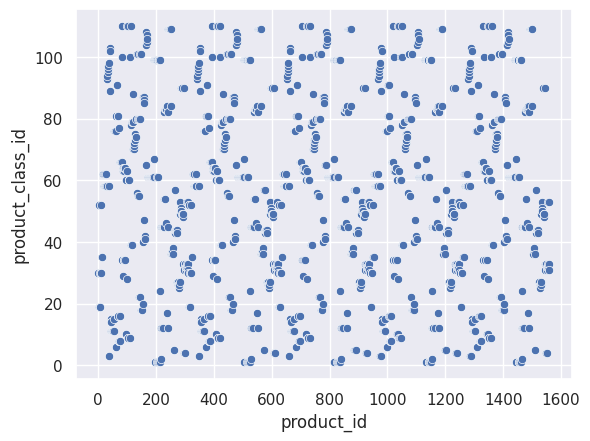

In [194]:
sns.scatterplot(df, x="product_id", y="product_class_id")

<Axes: xlabel='product_id', ylabel='product_class_id'>

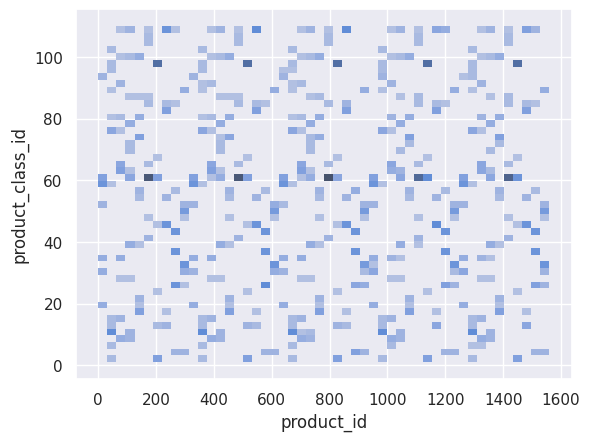

In [195]:
sns.histplot(df, x="product_id", y="product_class_id", bins=50)


<Axes: xlabel='brand_name', ylabel='count'>

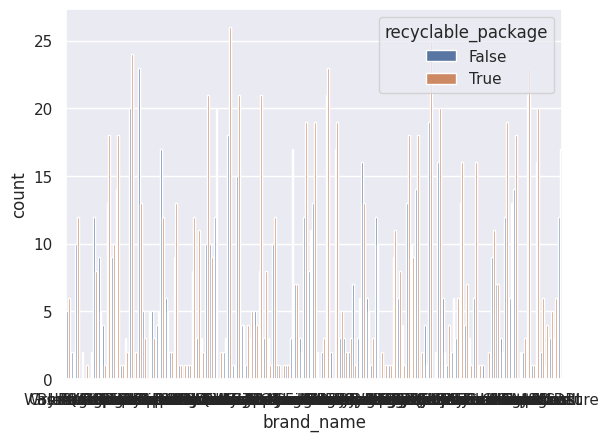

In [196]:
sns.countplot(df, x="brand_name", hue="recyclable_package")

In [197]:
# sns.pairplot(df, hue="brand_name")

<Axes: xlabel='brand_name', ylabel='product_id'>

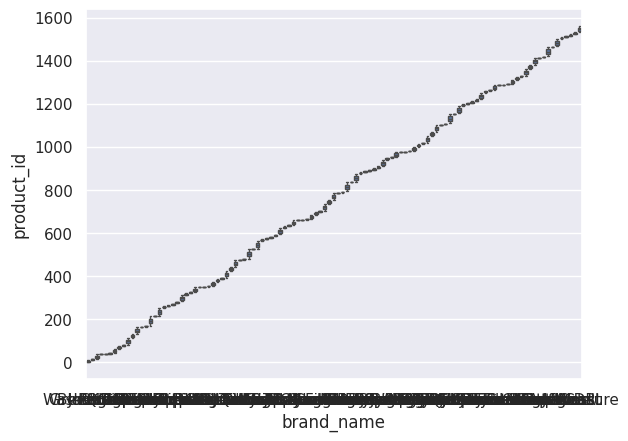

In [198]:
sns.boxplot(df, x="brand_name", y="product_id")

In [199]:
from sklearn.preprocessing import LabelEncoder


encode = ["brand_name", "product_name", "recyclable_package", "low_fat"]
label_encoder = LabelEncoder()

df_encoded = df.copy()
for col in encode:
    df_encoded[col] = label_encoder.fit_transform(df[col])

df_encoded.corr()


,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
product_class_id,1.000000,-0.002402,0.004679,0.006648,0.017435,0.002760,0.016571,0.020078,-0.059663,-0.070655,0.030086,0.026114,-0.012498,-0.058760,0.028178
product_id,-0.002402,1.000000,0.112812,0.121052,0.017311,-0.023605,0.026576,0.027628,0.032259,-0.027986,-0.022612,0.003134,-0.013184,-0.016140,0.025611
brand_name,0.004679,0.112812,1.000000,0.997269,-0.003552,-0.030055,-0.009000,-0.005298,0.026882,-0.033293,0.014160,-0.002669,-0.010508,0.020286,-0.024479
product_name,0.006648,0.121052,0.997269,1.000000,-0.001709,-0.028998,-0.009001,-0.005457,0.029254,-0.032252,0.011460,-0.000705,-0.012303,0.020303,-0.026675
SKU,0.017435,0.017311,-0.003552,-0.001709,1.000000,0.012730,-0.031194,-0.034787,-0.016165,-0.014995,0.051039,0.003085,0.036470,-0.008431,0.023001
SRP,0.002760,-0.023605,-0.030055,-0.028998,0.012730,1.000000,0.039002,0.035126,0.043347,-0.005348,-0.007463,0.027571,-0.002386,-0.004312,-0.012554
gross_weight,0.016571,0.026576,-0.009000,-0.009001,-0.031194,0.039002,1.000000,0.988900,0.054250,-0.034593,-0.012808,-0.008488,-0.007510,-0.020649,-0.006808
net_weight,0.020078,0.027628,-0.005298,-0.005457,-0.034787,0.035126,0.988900,1.000000,0.056604,-0.037028,-0.015725,-0.011146,-0.007462,-0.019894,-0.003197
recyclable_package,-0.059663,0.032259,0.026882,0.029254,-0.016165,0.043347,0.054250,0.056604,1.000000,-0.026755,0.001641,0.048342,0.069143,0.002720,-0.027174
low_fat,-0.070655,-0.027986,-0.033293,-0.032252,-0.014995,-0.005348,-0.034593,-0.037028,-0.026755,1.000000,0.024926,-0.042459,0.010921,0.045880,-0.012960


<Axes: >

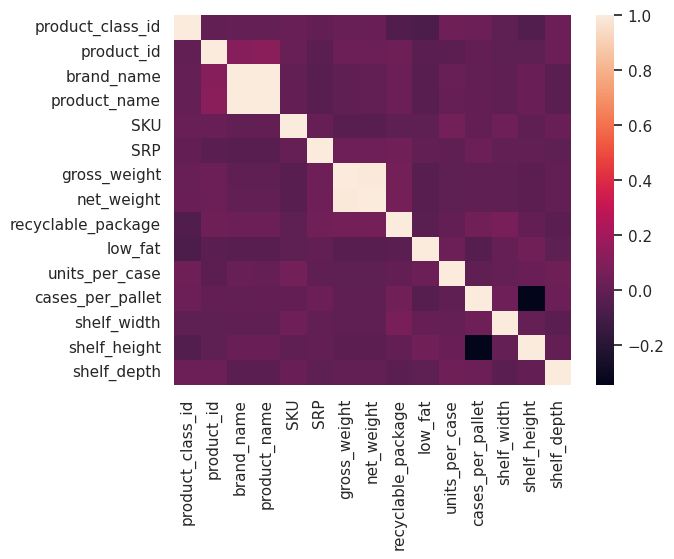

In [200]:
sns.heatmap(df_encoded.corr())


In [201]:
df.isnull().sum()

product_class_id      0
product_id            0
brand_name            0
product_name          0
SKU                   0
SRP                   0
gross_weight          0
net_weight            0
recyclable_package    0
low_fat               0
units_per_case        0
cases_per_pallet      0
shelf_width           0
shelf_height          0
shelf_depth           0
dtype: int64

In [202]:
df.dropna()
df.count()

product_class_id      1560
product_id            1560
brand_name            1560
product_name          1560
SKU                   1560
SRP                   1560
gross_weight          1560
net_weight            1560
recyclable_package    1560
low_fat               1560
units_per_case        1560
cases_per_pallet      1560
shelf_width           1560
shelf_height          1560
shelf_depth           1560
dtype: int64

In [203]:
Q1 = df_encoded.quantile(0.45)
Q3 = df_encoded.quantile(0.65)
IQR = Q3 - Q1
print(IQR)


product_class_id      1.100000e+01
product_id            3.118000e+02
brand_name            1.935000e+01
product_name          3.118000e+02
SKU                   1.744204e+10
SRP                   6.535000e-01
gross_weight          3.400000e+00
net_weight            3.600000e+00
recyclable_package    0.000000e+00
low_fat               1.000000e+00
units_per_case        7.450000e+00
cases_per_pallet      2.000000e+00
shelf_width           3.880000e+00
shelf_height          4.500000e+00
shelf_depth           3.500000e+00
dtype: float64


In [204]:
outliner_df = df_encoded.copy()
outliner_df["is_out"] = ~(( df_encoded < (Q1 - 1.5 * IQR))|( df_encoded > (Q3 + 1.5 * IQR))).any(axis=1)
outliner_df

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,is_out
0,30,1,110,1551,90748583674,2.85,8.39,6.39,0,0,30,14,16.90,12.60,7.40,False
1,52,2,110,1557,96516502499,0.74,7.42,4.42,0,1,18,8,13.40,3.71,22.60,False
2,52,3,110,1559,58427771925,0.83,13.10,11.10,1,1,17,13,14.40,11.00,7.77,False
3,19,4,110,1554,64412155747,3.64,10.60,9.60,1,0,26,10,22.90,18.90,7.93,False
4,19,5,110,1556,85561191439,2.19,6.66,4.65,1,0,7,10,20.70,21.90,19.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,53,1556,18,252,29538288712,2.65,6.94,3.94,1,1,7,9,11.10,3.98,17.50,False
1556,33,1557,18,268,50687324404,1.20,15.40,13.30,1,0,15,6,14.10,14.80,19.30,False
1557,53,1558,18,254,84930775761,2.16,11.50,9.50,0,1,22,10,7.35,9.29,12.40,False
1558,33,1559,18,246,75317577719,1.62,21.00,20.00,0,0,7,9,15.30,20.20,18.80,False


In [205]:
for col in encode:
    outliner_df[col] = df[col]
outliner_df

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,is_out
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.90,12.60,7.40,False
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.40,3.71,22.60,False
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.40,11.00,7.77,False
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.90,18.90,7.93,False
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.70,21.90,19.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,53,1556,CDR,CDR Creamy Peanut Butter,29538288712,2.65,6.94,3.94,True,True,7,9,11.10,3.98,17.50,False
1556,33,1557,CDR,CDR Strawberry Preserves,50687324404,1.20,15.40,13.30,True,False,15,6,14.10,14.80,19.30,False
1557,53,1558,CDR,CDR Extra Chunky Peanut Butter,84930775761,2.16,11.50,9.50,False,True,22,10,7.35,9.29,12.40,False
1558,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.80,False


In [206]:
string_columns = outliner_df.select_dtypes(include='object')

outliner_df[string_columns.columns] = string_columns.apply(lambda x: x.str.lower())
outliner_df

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,is_out
0,30,1,washington,washington berry juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.90,12.60,7.40,False
1,52,2,washington,washington mango drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.40,3.71,22.60,False
2,52,3,washington,washington strawberry drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.40,11.00,7.77,False
3,19,4,washington,washington cream soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.90,18.90,7.93,False
4,19,5,washington,washington diet soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.70,21.90,19.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,53,1556,cdr,cdr creamy peanut butter,29538288712,2.65,6.94,3.94,True,True,7,9,11.10,3.98,17.50,False
1556,33,1557,cdr,cdr strawberry preserves,50687324404,1.20,15.40,13.30,True,False,15,6,14.10,14.80,19.30,False
1557,53,1558,cdr,cdr extra chunky peanut butter,84930775761,2.16,11.50,9.50,False,True,22,10,7.35,9.29,12.40,False
1558,33,1559,cdr,cdr apple preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.80,False


In [207]:
def cut_brand(row):
    new_name = row["product_name"][len(row["brand_name"]):]
    return new_name

outliner_df["product_name"] = outliner_df.apply(cut_brand, axis=1)
outliner_df

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,is_out
0,30,1,washington,berry juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.90,12.60,7.40,False
1,52,2,washington,mango drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.40,3.71,22.60,False
2,52,3,washington,strawberry drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.40,11.00,7.77,False
3,19,4,washington,cream soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.90,18.90,7.93,False
4,19,5,washington,diet soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.70,21.90,19.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,53,1556,cdr,creamy peanut butter,29538288712,2.65,6.94,3.94,True,True,7,9,11.10,3.98,17.50,False
1556,33,1557,cdr,strawberry preserves,50687324404,1.20,15.40,13.30,True,False,15,6,14.10,14.80,19.30,False
1557,53,1558,cdr,extra chunky peanut butter,84930775761,2.16,11.50,9.50,False,True,22,10,7.35,9.29,12.40,False
1558,33,1559,cdr,apple preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.80,False
